<a href="https://colab.research.google.com/github/JVCarmich0959/Bimbimbop/blob/main/WayneNC_Voter_Demographic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Dataset Selection:**
For this project, I have selected a dataset available on GitHub that represents North Carolina voter data. The dataset encompasses several features, including voter demographics, race, and political party affiliation.



# Classification Problem:
The principal objective of this research is to develop a predictive model for determining an individual's political party affiliation based on an array of attributes provided within the dataset. The endeavor to forecast political affiliations has historically been both intricate and crucial, given the paramount role it plays in informing political strategies, campaign dynamics, and deciphering underlying voter behavioral patterns. This focus has emerged from a confluence of salient occurrences:

* A recent policy change now recognizes student identification cards as legitimate voter identification documents. In my capacity at the Student Activities Department, I have been directly engaged in the production of these IDs.

* Notably, the foundation's representatives have been conducting bespoke tours for prospective campaign donors and the board of elections, a fascinating week-long initiative indicative of the growing importance of personalized political outreach.

* A demographic analysis of the WCC student population reveals that a significant proportion falls within age categories traditionally linked with political non-affiliation. This suggests that for politicians - particularly at the local level - the campus represents a fertile ground of uncommitted voters, presenting substantial opportunities for both grassroots and large-scale campaign initiatives.

###Why Is This Interesting?

Political party affiliation prediction offers multiple insights:

* Personalization of Campaigns: By understanding what factors influence a person's political affiliation, political campaigns can tailor their messages to specific demographics, enhancing outreach and engagement.

* Election Strategy: Predicting party affiliation can aid in allocating resources efficiently in regions with higher undecided or swing voters.

* Public Policy Implications: Insights from this analysis can help policymakers understand the concerns and priorities of different demographics, which can guide in the formulation of inclusive policies.

* Social Science Research: This exercise offers an interdisciplinary approach combining political science and machine learning, enhancing our understanding of voter behavior.

# Target Feature:
The target feature for this classification problem is the ‘party_cd’ column. The dataset provides various political party codes, and our goal is to predict this feature based on other attributes.

# Nature of the Data:
 * Numeric Features: Some of the columns in the dataset are represented numerically.

* Categorical Features: The dataset consists of several categorical features, like race, gender, and political party affiliation.

* Missing Values: Initial exploration of the dataset revealed the presence of missing values (NaNs) in some columns. Appropriate preprocessing steps, like imputation or removal of such instances, will be employed during the data preparation stage.

## Conclusion:

This project promises a blend of data analysis, machine learning, and understanding of sociopolitical behavior. While the dataset is structured and apt for a classification problem, its real-world implications make the analysis all the more intriguing. I am excited to delve deeper into this dataset and uncover patterns and insights that could potentially offer a fresh perspective on voter behavior and political strategy.


In [130]:
# -*- coding: utf-8 -*-
"""WayneNC_Voter_Demographic.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1ZBfM4W64bwBg5Xf6TK45BC-H3X90823F
"""


'WayneNC_Voter_Demographic.ipynb\n\nAutomatically generated by Colaboratory.\n\nOriginal file is located at\n    https://colab.research.google.com/drive/1ZBfM4W64bwBg5Xf6TK45BC-H3X90823F\n'

# Imports

Importing all the required libraries and modules

In [131]:
!pip install optuna
!pip install deap


In [132]:
#--------------------
# 1. Imports
#--------------------

import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
import pandas as pd
import geopandas as gpd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score, confusion_matrix, roc_curve, auc, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import label_binarize
from deap import base, creator, tools

import random




# Data Collection

In [133]:
# Load the data
url = "https://raw.githubusercontent.com/JVCarmich0959/Bimbimbop/main/ncvoter96%202.csv"
df = pd.read_csv(url)

df.head()

,county_id,county_desc,voter_reg_num,ncid,last_name,first_name,middle_name,name_suffix_lbl,status_cd,voter_status_desc,...,sanit_dist_abbrv,sanit_dist_desc,rescue_dist_abbrv,rescue_dist_desc,munic_dist_abbrv,munic_dist_desc,dist_1_abbrv,dist_1_desc,vtd_abbrv,vtd_desc
0,96,WAYNE,30021555,EM78568,AANENSON,ASHLEY,ANNE,NaN,A,ACTIVE,...,NaN,NaN,NaN,NaN,MO,MT. OLIVE,9.0,9TH PROSECUTORIAL,30.0,30.0
1,96,WAYNE,30030000,EM86644,AANENSON,FRANK,LEE,SR,A,ACTIVE,...,E,EASTERN WAYNE,NaN,NaN,NaN,NaN,9.0,9TH PROSECUTORIAL,7.0,7.0
2,96,WAYNE,30079498,EM125851,AANENSON,FRANK,LEE,NaN,I,INACTIVE,...,NaN,NaN,NaN,NaN,GBO,GOLDSBORO,9.0,9TH PROSECUTORIAL,12.0,12.0
3,96,WAYNE,30026634,EM83647,AANENSON,LEONOR,NaN,NaN,A,ACTIVE,...,E,EASTERN WAYNE,NaN,NaN,NaN,NaN,9.0,9TH PROSECUTORIAL,7.0,7.0
4,96,WAYNE,30096930,BD148950,AANERUD,CHARITY,NaN,NaN,A,ACTIVE,...,NaN,NaN,NaN,NaN,GBO,GOLDSBORO,9.0,9TH PROSECUTORIAL,21.0,21.0


# Data Cleaning & Preprocessing:

In [134]:
df = df[df['age_at_year_end'] < 99] # also I'm sure there are people over 100 in Wayne but...the amount of 99+ seemed suscpicious.
# Note the original dataset contained 85,268 rows and when I applied the
#filter above there was only 62,737 meaning that 22,511 of the voters in the set that were "inactive"
# Also realize how problematic it is to train a predictive classification model on demographics...

necessary_columns = ['race_code', 'party_cd', 'gender_code',
                    'birth_year', 'birth_state', 'age_at_year_end',
                    'precinct_desc']

df = df[necessary_columns]

# Replace NaN values in 'Birth State' with 'NC'
df['birth_state'].fillna('NC', inplace=True)

#dropping missing precincts
df = df.dropna(subset=['precinct_desc'])





core_parties = ['DEM', 'REP', 'UNA']  # Poor civic power utilization hinders model performance...
df = df[df['party_cd'].isin(core_parties)]


In [135]:
df


,race_code,party_cd,gender_code,birth_year,birth_state,age_at_year_end,precinct_desc
0,W,UNA,F,1984,VA,39,2530.0
1,W,REP,M,1956,CA,67,7.0
2,W,UNA,M,1980,CA,43,12.0
3,W,REP,F,1955,OC,68,7.0
4,W,REP,F,1986,NY,37,21.0
...,...,...,...,...,...,...,...
85263,W,REP,F,1942,NC,81,6.0
85264,W,REP,F,1976,NC,47,6.0
85265,W,REP,M,1943,NC,80,6.0
85266,A,UNA,F,1949,OC,74,7.0


# Feature Engineering


In [136]:
# 1. Group by precinct and party, then count
voter_counts = df.groupby(['precinct_desc', 'party_cd']).size().reset_index(name='count')

# 2. Calculate the total voters per precinct
total_voters = df.groupby('precinct_desc').size().reset_index(name='total')

# 3. Merge total_voters with voter_counts
voter_counts = voter_counts.merge(total_voters, on='precinct_desc')

# 4. Calculate the proportion
voter_counts['weight'] = voter_counts['count'] / voter_counts['total']

# 5. Merge the 'weight' column back to the main dataframe
df = df.merge(voter_counts[['precinct_desc', 'party_cd', 'weight']], on=['precinct_desc', 'party_cd'], how='left')

In [137]:
# lets take a look at our dataframe:
df

,race_code,party_cd,gender_code,birth_year,birth_state,age_at_year_end,precinct_desc,weight
0,W,UNA,F,1984,VA,39,2530.0,0.250636
1,W,REP,M,1956,CA,67,7.0,0.395203
2,W,UNA,M,1980,CA,43,12.0,0.297699
3,W,REP,F,1955,OC,68,7.0,0.395203
4,W,REP,F,1986,NY,37,21.0,0.168229
...,...,...,...,...,...,...,...,...
73397,W,REP,F,1942,NC,81,6.0,0.355369
73398,W,REP,F,1976,NC,47,6.0,0.355369
73399,W,REP,M,1943,NC,80,6.0,0.355369
73400,A,UNA,F,1949,OC,74,7.0,0.297691


In [138]:
# Age Binning: Instead of using exact ages,I can categorize people into age groups
bins = [18, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
df['age_group'] = pd.cut(df['age_at_year_end'], bins=bins, labels=labels, right=False)


In [139]:
# Generations: Calculating which decade an individual was born in.
def assign_generation(year):
    if 1928 <= year <= 1945:
        return "Silent"
    elif 1946 <= year <= 1964:
        return "Boomer"
    elif 1965 <= year <= 1980:
        return "Gen X"
    elif 1981 <= year <= 1996:
        return "Millennial"
    elif 1997 <= year <= 2012:
        return "Gen Z"
    else:
        return "Gen Alpha"

df['generation'] = df['birth_year'].apply(assign_generation)

In [140]:
# Interaction Features: combining demographic variables
df['race_gender'] = df['race_code'] + df['gender_code']

In [141]:
df['generation_race_gender'] = df['generation'] + "_" + df['race_gender']

In [142]:
scaler = MinMaxScaler()
df['age_scaled'] = scaler.fit_transform(df[['age_at_year_end']])

In [143]:
df

,race_code,party_cd,gender_code,birth_year,birth_state,age_at_year_end,precinct_desc,weight,age_group,generation,race_gender,generation_race_gender,age_scaled
0,W,UNA,F,1984,VA,39,2530.0,0.250636,30-39,Millennial,WF,Millennial_WF,0.2625
1,W,REP,M,1956,CA,67,7.0,0.395203,60-69,Boomer,WM,Boomer_WM,0.6125
2,W,UNA,M,1980,CA,43,12.0,0.297699,40-49,Gen X,WM,Gen X_WM,0.3125
3,W,REP,F,1955,OC,68,7.0,0.395203,60-69,Boomer,WF,Boomer_WF,0.6250
4,W,REP,F,1986,NY,37,21.0,0.168229,30-39,Millennial,WF,Millennial_WF,0.2375
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73397,W,REP,F,1942,NC,81,6.0,0.355369,80-89,Silent,WF,Silent_WF,0.7875
73398,W,REP,F,1976,NC,47,6.0,0.355369,40-49,Gen X,WF,Gen X_WF,0.3625
73399,W,REP,M,1943,NC,80,6.0,0.355369,80-89,Silent,WM,Silent_WM,0.7750
73400,A,UNA,F,1949,OC,74,7.0,0.297691,70-79,Boomer,AF,Boomer_AF,0.7000


# Data Exploration & Visualization

Doing some preliminary analysis of the data to understand its structure, columns, and types.

Visualizations to understand data distribution, patterns, and potential outliers.

## Exploring Age:

<ipython-input-144-43b7ee37ac12>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['age_group'], bins=6, palette='pastel')


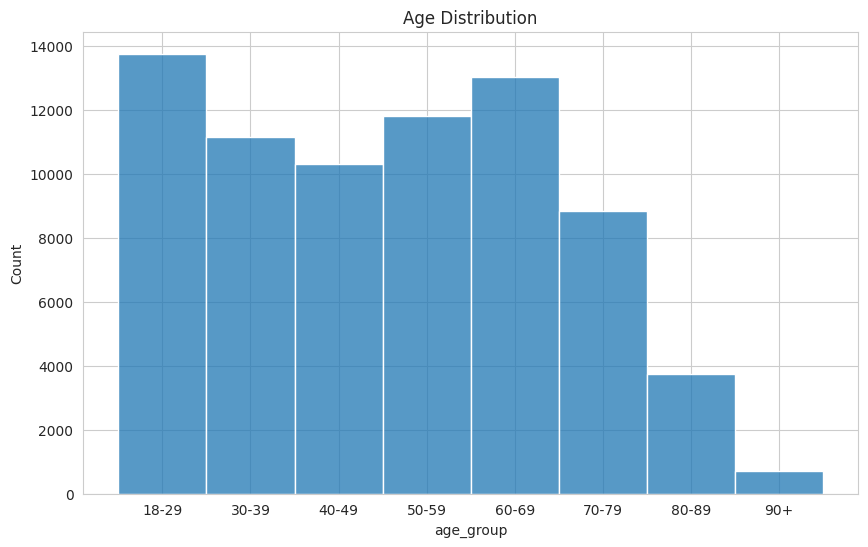

In [144]:

# Set the style of seaborn for better visualization
sns.set_style("whitegrid")

# Histogram for age
plt.figure(figsize=(10, 6))
sns.histplot(df['age_group'], bins=6, palette='pastel')
plt.title('Age Distribution')
plt.show()

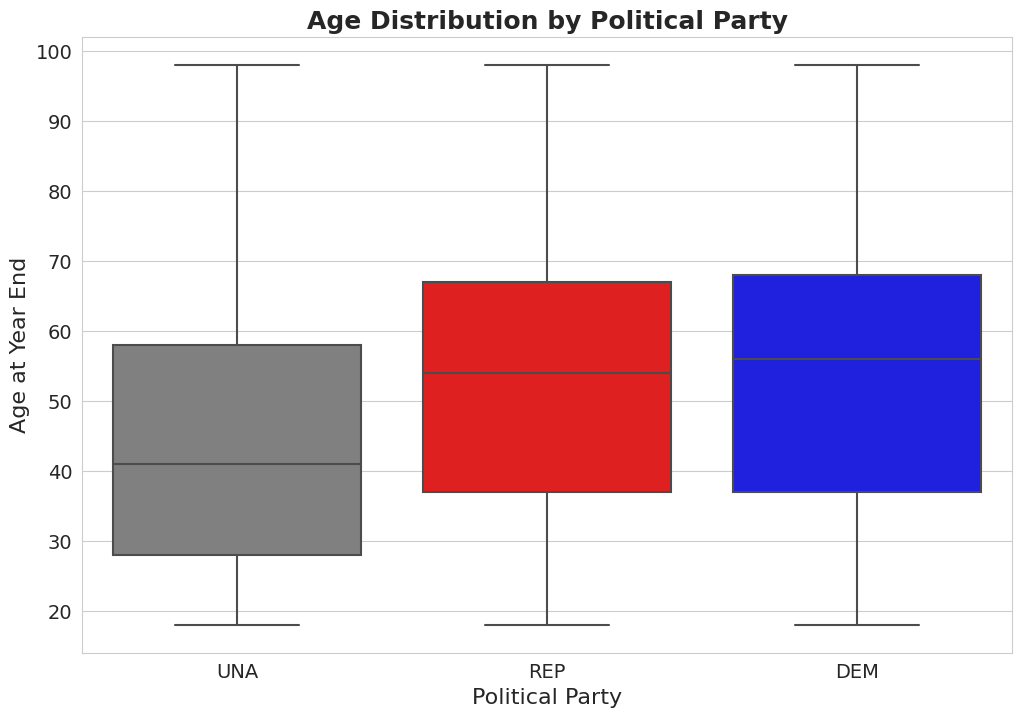

In [145]:
# Define party colors
party_colors = {
    'DEM': 'blue',
    'REP': 'red',
    'UNA': 'gray'  # Adjust as needed
}

# Box plot for age with party colors
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='party_cd', y='age_at_year_end', palette=party_colors)
plt.title('Age Distribution by Political Party', fontsize=18, fontweight='bold')
plt.ylabel('Age at Year End', fontsize=16)
plt.xlabel('Political Party', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()


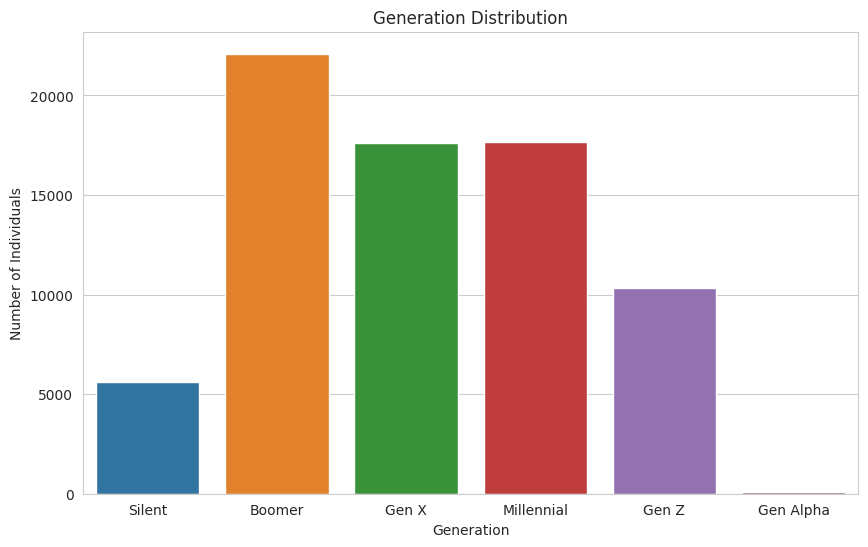

In [146]:
# Set the style of seaborn for better visualization
sns.set_style("whitegrid")

# Bar plot for generation
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='generation', order=['Silent', 'Boomer', 'Gen X', 'Millennial', 'Gen Z', 'Gen Alpha'])
plt.title('Generation Distribution')
plt.ylabel('Number of Individuals')
plt.xlabel('Generation')
plt.show()


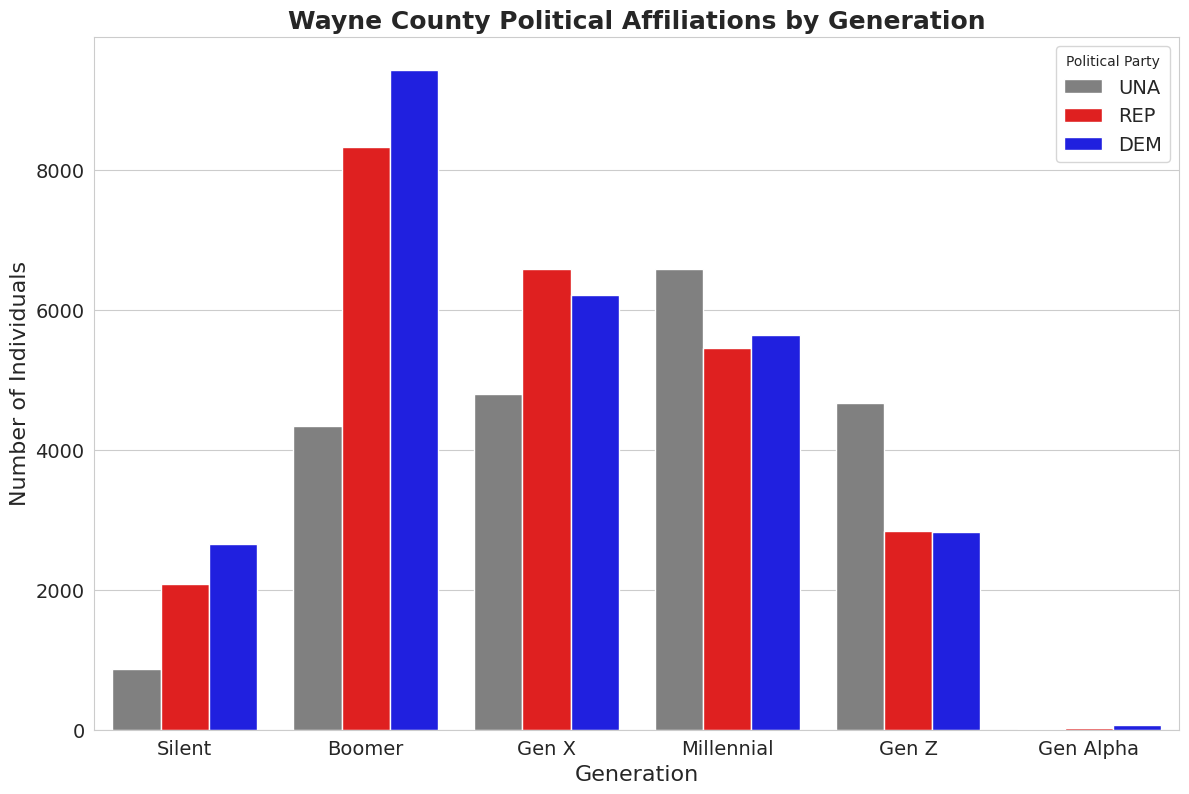

In [147]:
# Set the style of seaborn for better visualization
sns.set_style("whitegrid")

# Grouped bar plot for political affiliations by generation with party colors
plt.figure(figsize=(14, 9))
sns.countplot(data=df, x='generation', hue='party_cd', palette=party_colors, order=['Silent', 'Boomer', 'Gen X', 'Millennial', 'Gen Z', 'Gen Alpha'])

# Enhanced titles and labels for better readability
plt.title('Wayne County Political Affiliations by Generation', fontsize=18, fontweight='bold')
plt.ylabel('Number of Individuals', fontsize=16)
plt.xlabel('Generation', fontsize=16)
plt.legend(title='Political Party', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()


#Exploring Race:

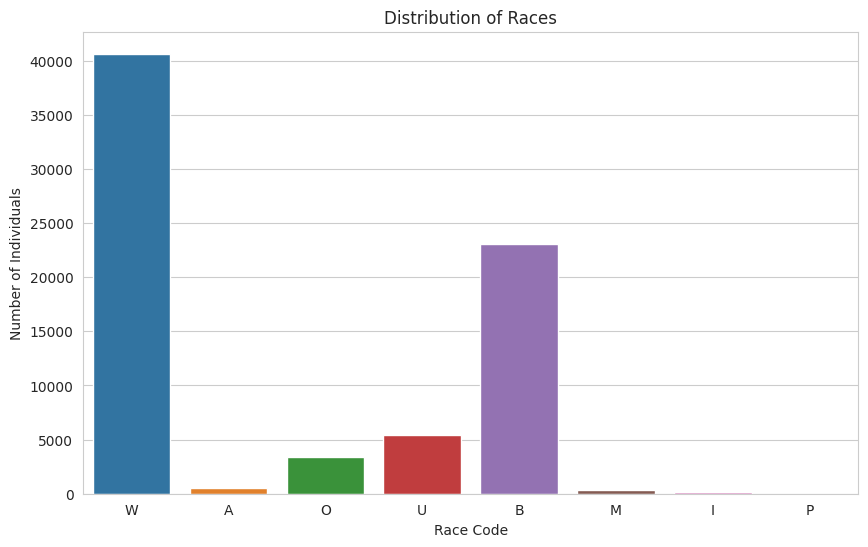

In [148]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='race_code')
plt.title('Distribution of Races')
plt.ylabel('Number of Individuals')
plt.xlabel('Race Code')
plt.show()


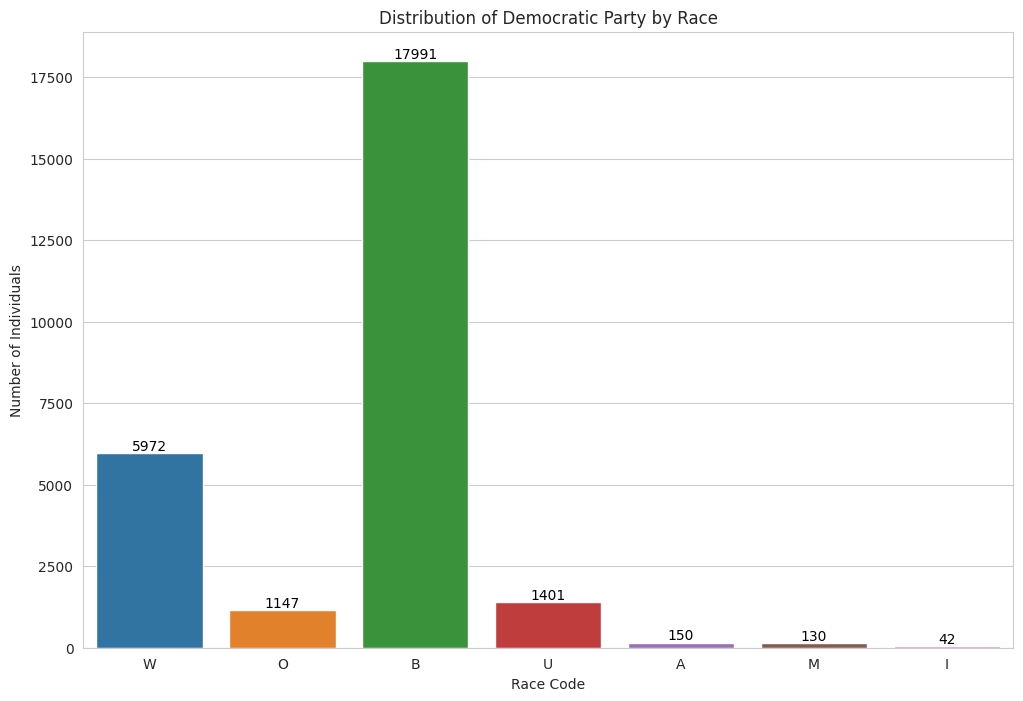

In [149]:
dem_df = df[df['party_cd'] == 'DEM']
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=dem_df, x='race_code')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Democratic Party by Race')
plt.xlabel('Race Code')
plt.ylabel('Number of Individuals')
plt.show()


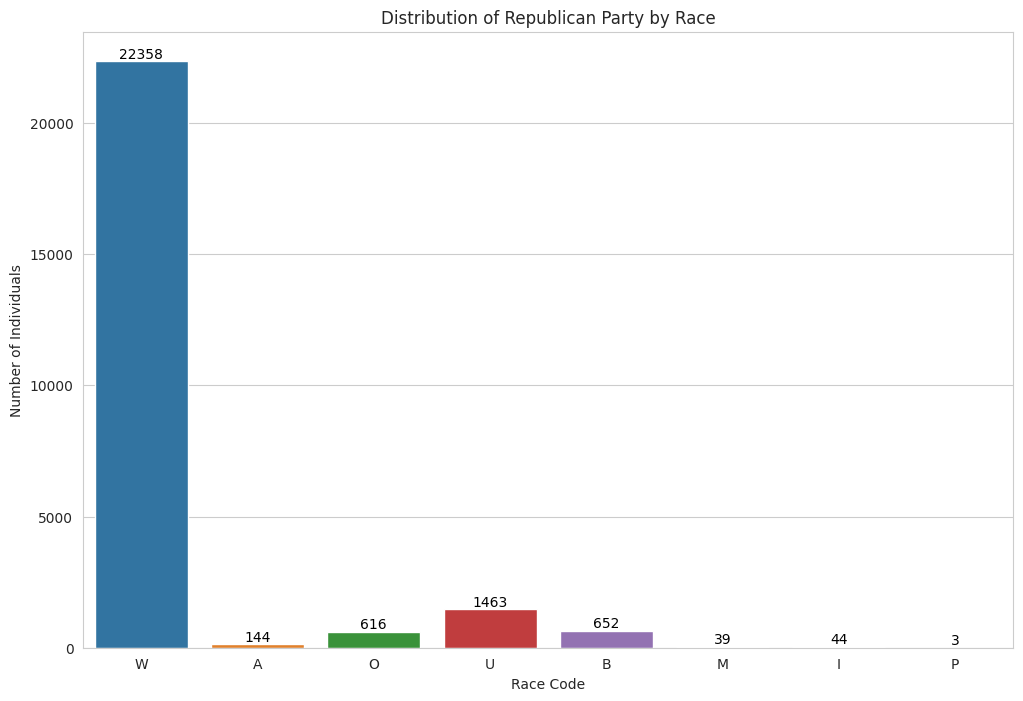

In [150]:
rep_df = df[df['party_cd'] == 'REP']
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=rep_df, x='race_code')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Republican Party by Race')
plt.xlabel('Race Code')
plt.ylabel('Number of Individuals')
plt.show()


# Analysis:

It's going to be difficult to capture unique insight given that it's distribution is heavily influenced by race...


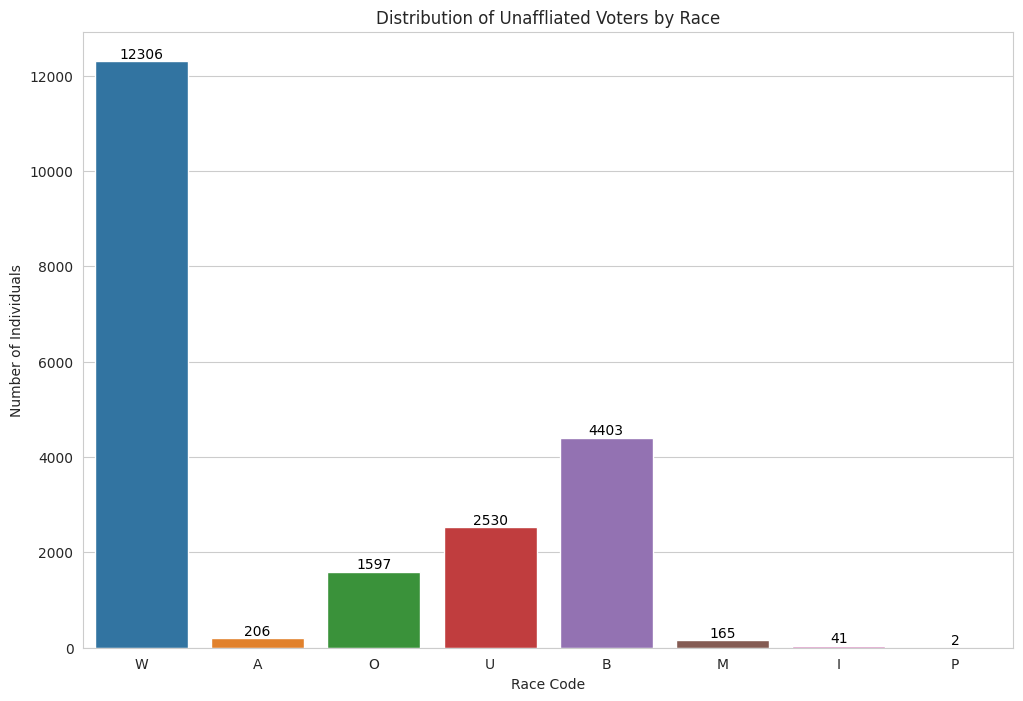

In [151]:
una_df = df[df['party_cd'] == 'UNA']
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=una_df, x='race_code')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Unaffliated Voters by Race')
plt.xlabel('Race Code')
plt.ylabel('Number of Individuals')
plt.show()

In [152]:
una_df.describe()

,birth_year,age_at_year_end,precinct_desc,weight,age_scaled
count,21250.000000,21250.000000,21250.000000,21250.000000,21250.000000
mean,1979.283435,43.716565,168.508847,0.291047,0.321457
std,18.134445,18.134445,574.402341,0.020962,0.226681
min,1925.000000,18.000000,1.000000,0.250483,0.000000
25%,1965.000000,28.000000,6.000000,0.279710,0.125000
50%,1982.000000,41.000000,12.000000,0.296296,0.287500
75%,1995.000000,58.000000,23.000000,0.303626,0.500000
max,2005.000000,98.000000,2530.000000,0.337745,1.000000


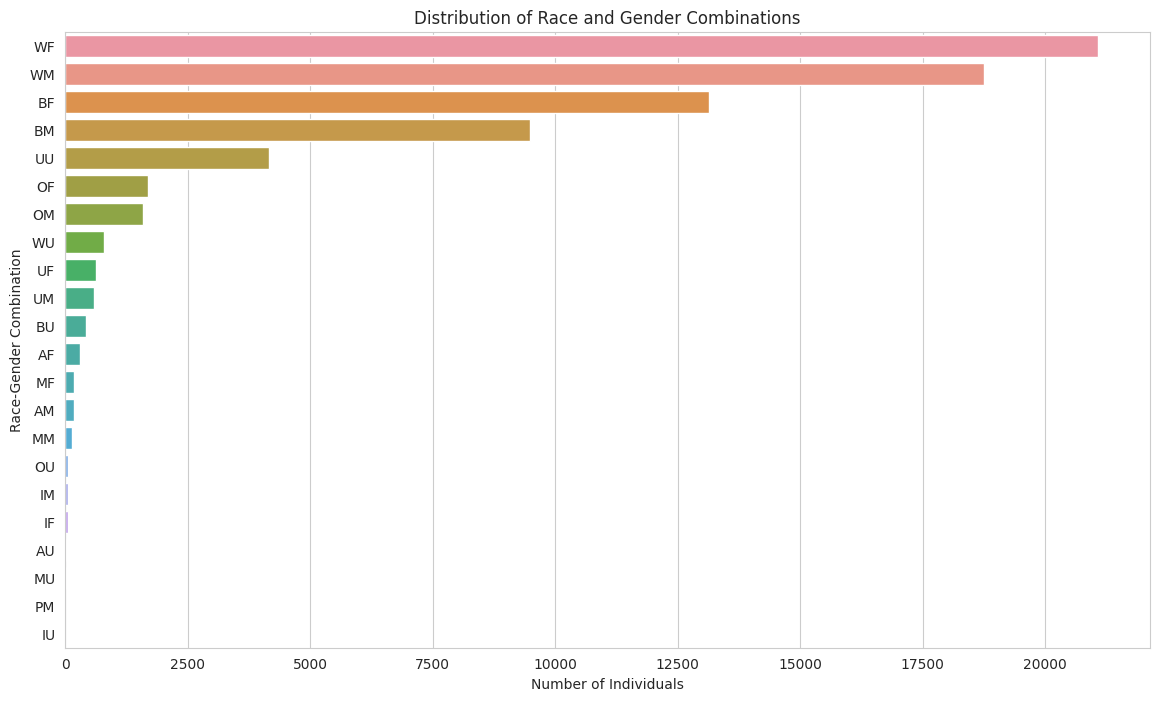

In [153]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, y='race_gender', order=df['race_gender'].value_counts().index)  # Y-axis to better fit long horizontal bars
plt.title('Distribution of Race and Gender Combinations')
plt.xlabel('Number of Individuals')
plt.ylabel('Race-Gender Combination')
plt.show()


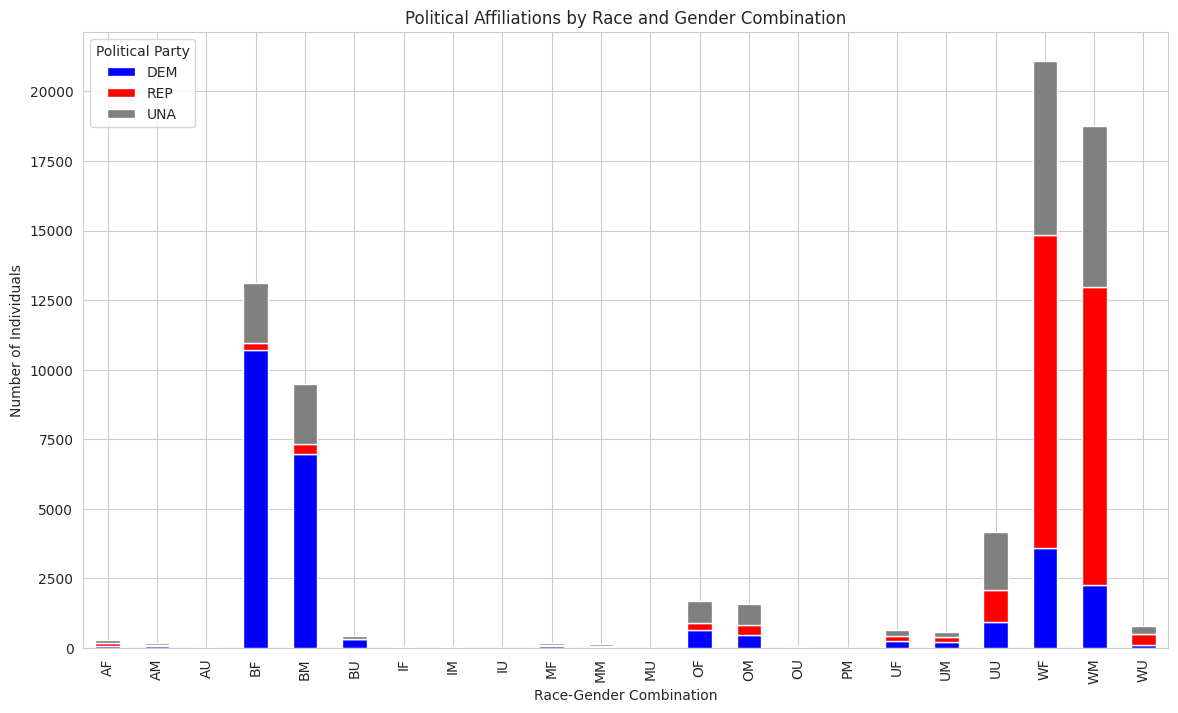

In [154]:

# Create a crosstab of race_gender and party_cd
ct = pd.crosstab(df['race_gender'], df['party_cd'])

# Plot with party colors
ct.plot(kind='bar', stacked=True, figsize=(14, 8), color=[party_colors[col] for col in ct.columns])
plt.title('Political Affiliations by Race and Gender Combination')
plt.xlabel('Race-Gender Combination')
plt.ylabel('Number of Individuals')
plt.legend(title='Political Party')
plt.show()


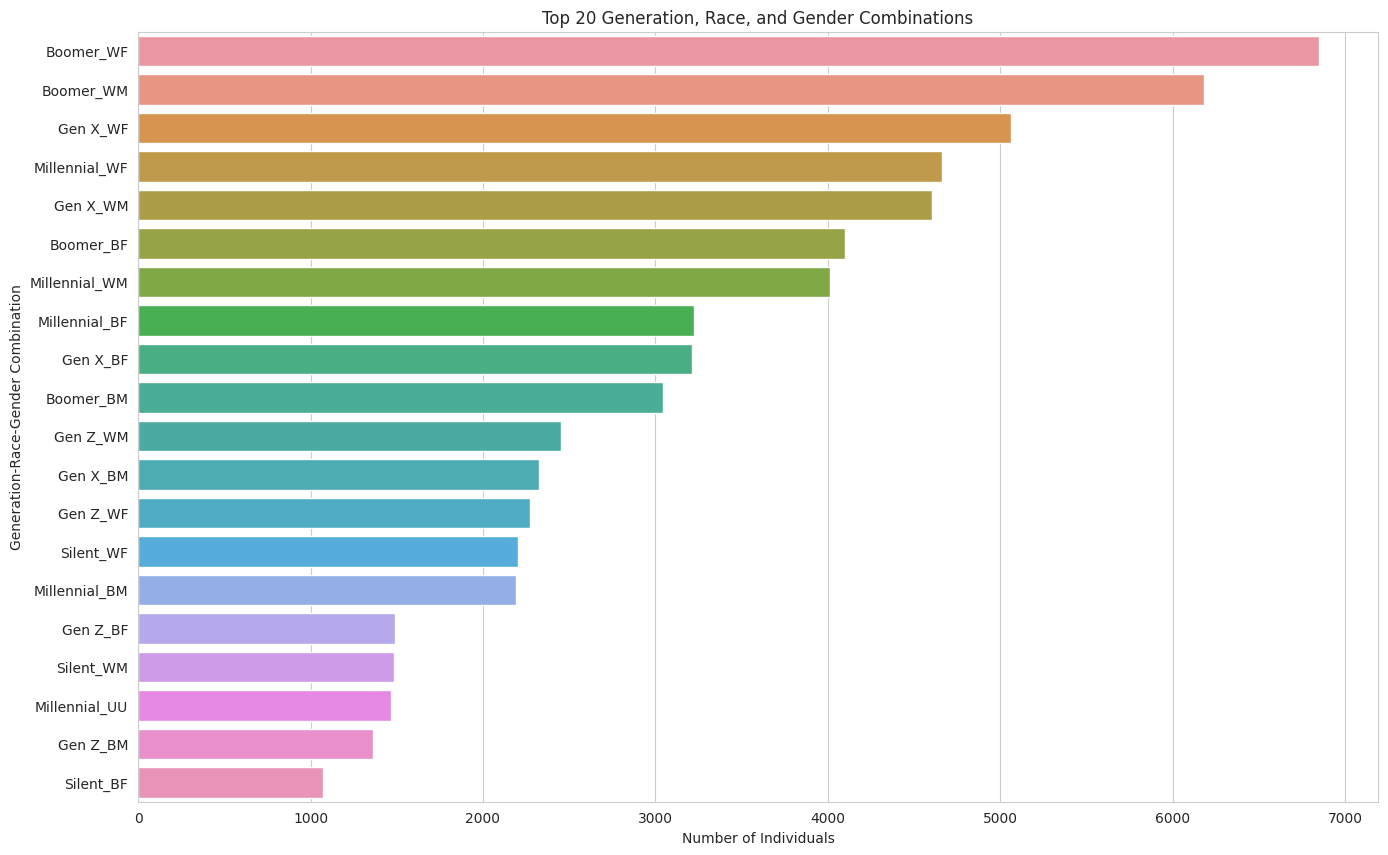

In [155]:
top_n = 20  # Adjust as needed
top_categories = df['generation_race_gender'].value_counts().head(top_n).index

plt.figure(figsize=(16, 10))
sns.countplot(data=df, y='generation_race_gender', order=top_categories)
plt.title(f'Top {top_n} Generation, Race, and Gender Combinations')
plt.xlabel('Number of Individuals')
plt.ylabel('Generation-Race-Gender Combination')
plt.show()


<Figure size 1600x1000 with 0 Axes>

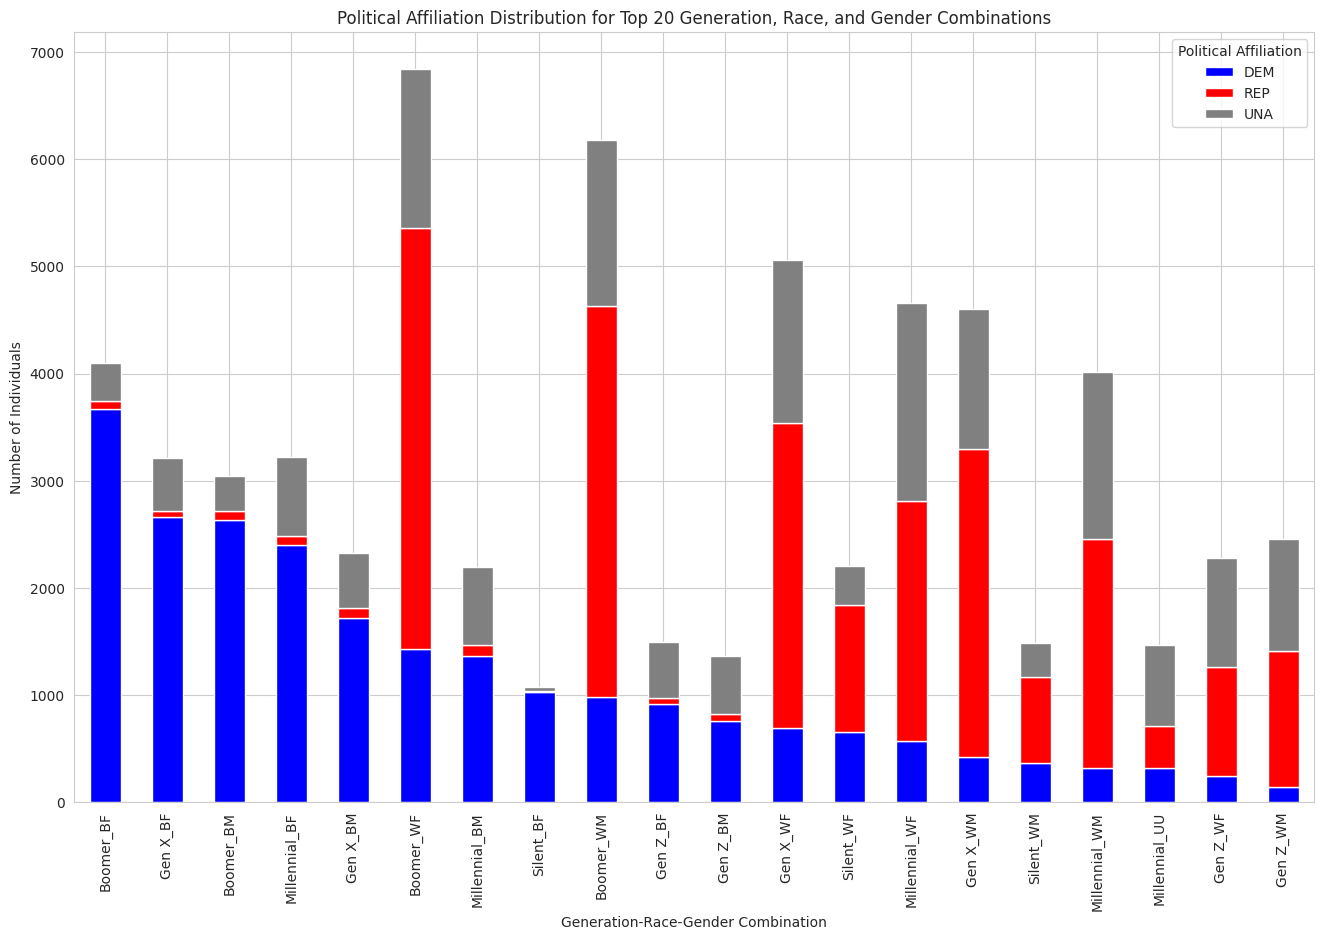

In [156]:

plt.figure(figsize=(16, 10))

# Group data by 'generation_race_gender' and 'party_cd' and count the occurrences
grouped = df[df['generation_race_gender'].isin(top_categories)].groupby(['generation_race_gender', 'party_cd']).size().unstack()

# Sort the grouped data by total count for better visualization
grouped = grouped.sort_values(by='DEM', ascending=False)  # Adjust based on the dominant party in your data or any other criteria

# Plot stacked bar chart with party colors
grouped.plot(kind='bar', stacked=True, figsize=(16, 10), color=[party_colors[col] for col in grouped.columns])

plt.title(f'Political Affiliation Distribution for Top {top_n} Generation, Race, and Gender Combinations')
plt.ylabel('Number of Individuals')
plt.xlabel('Generation-Race-Gender Combination')
plt.legend(title='Political Affiliation')
plt.show()


In [157]:
grouped_sorted = grouped.sort_values(by='UNA', ascending=False)
top_category = grouped_sorted.index[0]
print(f"The top demographic category for unaffiliated voters are the : {top_category}")


The top demographic category for unaffiliated voters are the : Millennial_WF


This could be useful for targeting campaign advertisements...what things are trending among this demographic and how can we use these generalizations to fine-tune our rehtorical strategies?

# Evaluating the Relationship between Precinct and Party Affiliation



<Figure size 1500x700 with 0 Axes>

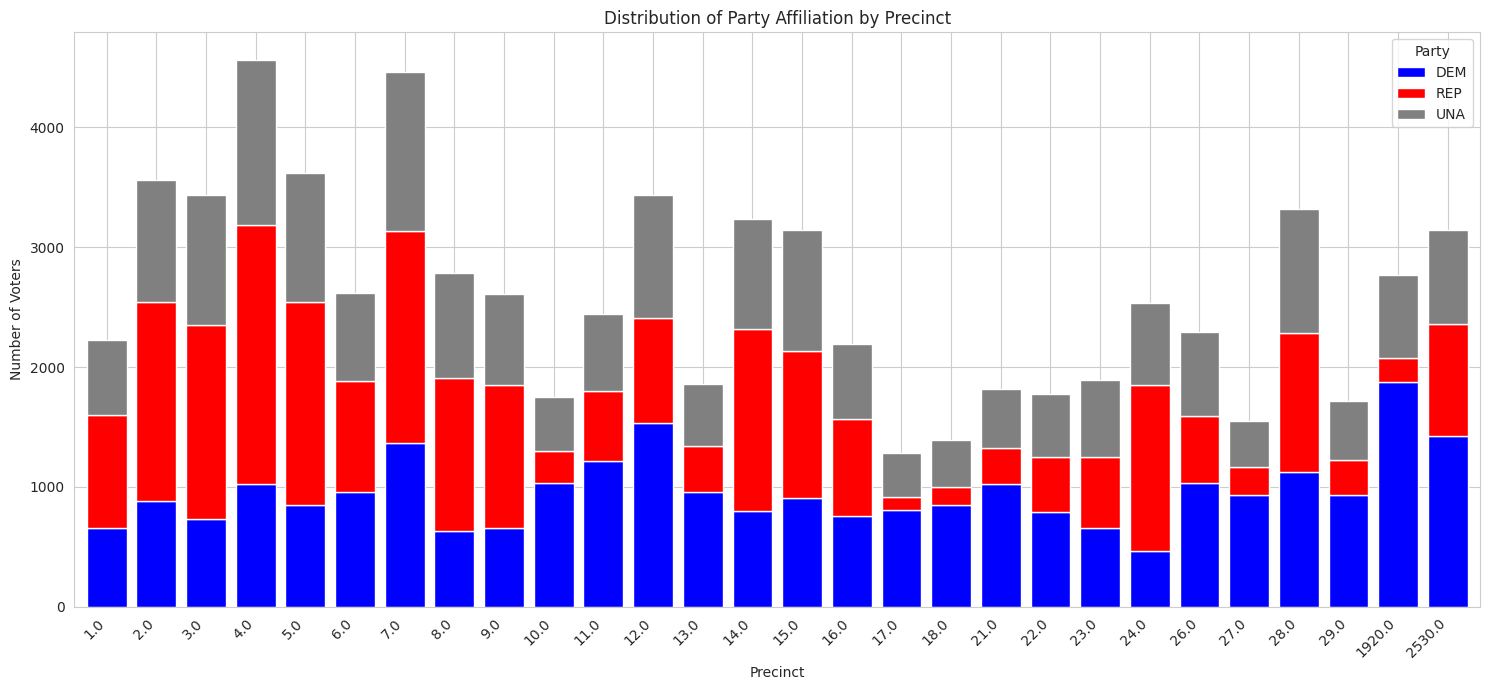

In [158]:
party_counts = df.groupby(['precinct_desc', 'party_cd']).size().unstack().fillna(0) #irst need to pivot the data to get counts of each party affiliation by precinct.

plt.figure(figsize=(15, 7))

# Creating the stacked bar chart with color mapping
party_counts.plot(kind='bar', stacked=True, figsize=(15,7), width=0.8, color=[party_colors[col] for col in party_counts.columns])

# Setting the title and labels
plt.title('Distribution of Party Affiliation by Precinct')
plt.xlabel('Precinct')
plt.ylabel('Number of Voters')
plt.legend(title='Party')

# Rotating x-labels for better readability
plt.xticks(rotation=45, ha='right')

# Displaying the plot
plt.tight_layout()
plt.show()


#Modeling

## Splitting the data, encoding, setting up classifiers...

In [166]:
df['precinct_desc'] = df['precinct_desc'].astype(str) # this is an indicator and not a numeric predictor


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73402 entries, 0 to 73401
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   race_code               73402 non-null  object  
 1   party_cd                73402 non-null  object  
 2   gender_code             73402 non-null  object  
 3   birth_year              73402 non-null  int64   
 4   birth_state             73402 non-null  object  
 5   age_at_year_end         73402 non-null  int64   
 6   precinct_desc           73402 non-null  object  
 7   weight                  73402 non-null  float64 
 8   age_group               73402 non-null  category
 9   generation              73402 non-null  object  
 10  race_gender             73402 non-null  object  
 11  generation_race_gender  73402 non-null  object  
 12  age_scaled              73402 non-null  float64 
dtypes: category(1), float64(2), int64(2), object(8)
memory usage: 7.4+ MB


In [161]:
# Separate features and target variable
X = df.drop('party_cd', axis=1)
y = df['party_cd']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Columns that are already in the desired format and don't need any transformation
pass_through_features = ['age_scaled', 'weight']

# Get a list of columns to be encoded
columns_to_encode = X_train.columns.difference(pass_through_features)

# Set up the column transformer with OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), columns_to_encode),
        ('pass', 'passthrough', pass_through_features)
    ]
)

# Fit the encoder on training data and transform training and test data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)


In [162]:
# Using default parameters for RandomForest
rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train_encoded, y_train)
rf_default_pred = rf_default.predict(X_test_encoded)


# Evaluation:

In [163]:
# Calculate accuracy
rf_default_accuracy = accuracy_score(y_test, rf_default_pred)
print(f"RandomForest Accuracy (Default Parameters): {rf_default_accuracy:.4f}")


RandomForest Accuracy (Default Parameters): 0.9307


In [164]:
y_pred = rf_default.predict(X_test_encoded)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         DEM       0.93      0.93      0.93      8001
         REP       0.96      0.94      0.95      7646
         UNA       0.90      0.93      0.91      6374

    accuracy                           0.93     22021
   macro avg       0.93      0.93      0.93     22021
weighted avg       0.93      0.93      0.93     22021



The result's of our trained classification model provides a deep insight into its performance across three distinct political affiliations: DEM, REP, and UNA. These metrics, encompassing precision, recall, and the F1-score, furnish a comprehensive overview of the model's capabilities and areas of excellence.

# **Beginning with precision...**
 which is a measure of how well the model performs when it predicts a certain class, we observe commendable results. Precision quantifies the proportion of correct positive predictions out of all the positive predictions made by the model. For the DEM class, a precision of 0.93 signifies that when the model asserts an instance belongs to the DEM category, it's accurate about 93% of the time. Similarly impressive, the REP class has a precision of 0.96, indicating that its predictions are slightly more reliable than those for DEM. The UNA class trails a bit with a precision of 0.90, but this is still an impressive figure.It means that the model is quite adept at making precise predictions across all three classes.

# **Recall (Sensitivity):**
This  metric, presents a slightly different perspective. It gauges the model's ability to correctly identify all the instances of a particular class. In essence, recall delves into the question: "Of all the actual positive instances, how many did the model manage to detect correctly?" For the DEM category, a recall value of 0.93 elucidates that the model correctly identifies 93% of all actual DEM instances. The narrative is almost identical for the REP and UNA categories, with the model spotting 94% and 93% of the instances correctly, respectively.


 # **F-1 Metric Harmonization:**
 F1-score comes into play by acting as the harmonic mean of precision and recall. An F1-score nearing 1 indicates an impeccable balance between precision and recall, while a score closer to 0 suggests the opposite. Analyzing our results, the DEM category boasts an F1 score of 0.93, indicating a well-balanced performance between precision and recall for this class. The REP and UNA categories mirror this performance, showcasing the model's consistent ability across classes.

# **Accuracy:**
An overarching metric that encapsulates the model's entire performance is accuracy. At 93%, the accuracy indicates that the model's predictions, across all classes, are on point a vast majority of the time. This high accuracy further underscores the reliability and robustness of this classification model.


In addition there are two additional metrics evaluated the macro and weighted averages. The macro average computes the average score across the three classes without weighing them according to their proportions. Here, for precision, recall, and F1-score, the macro average hovers around 0.93, painting a consistent picture of the model's performance. The weighted average, on the other hand, factors in the number of instances in each class. It's especially relevant when dealing with datasets where the class distribution isn't equal. In this case, the weighted average metrics for precision, recall, and the F1-score all converge at 0.93. This congruence between the macro and weighted averages suggests a fairly balanced class distribution.

This model holds promise the classification model  created here exhibits stellar performance across various metrics and classes. The consistency in precision, recall, and the F1-score, coupled with the high accuracy, is indicative of the model's reliability. Such consistent and high scores, especially in politics affiliations where the data can be quite diverse, demonstrate the robustness and credibility of the model. As data-driven decision-making becomes increasingly crucial, having a reliable model, as indicated by these metrics, can be a game-changer.

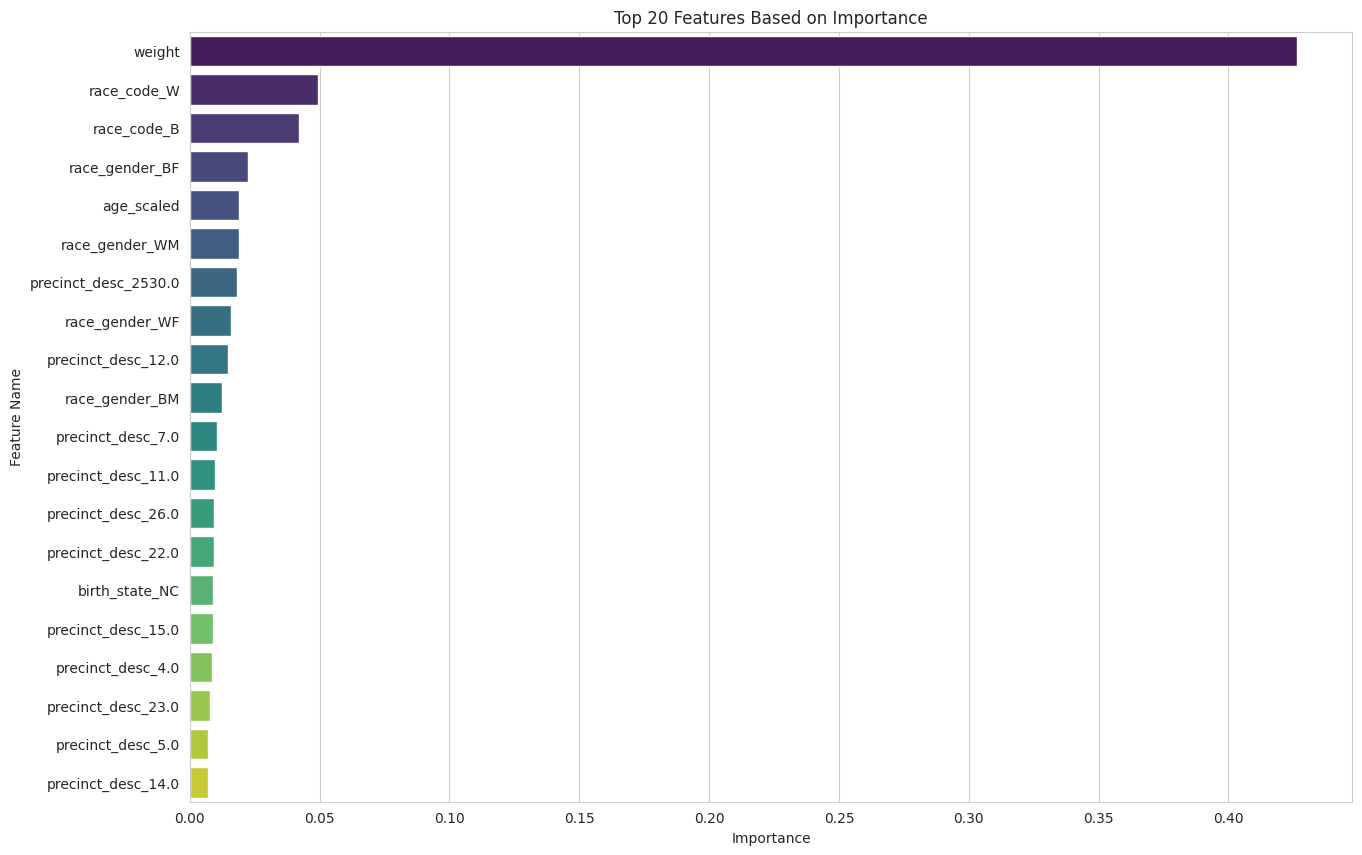

In [165]:
# Extract feature importance from the RandomForest model
feature_importance = rf_default.feature_importances_

# Getting the feature names from the column transformer
# Since we applied OneHotEncoding to some columns, the number of features will increase. So, we need to extract the correct names.
feature_names = (preprocessor.named_transformers_['cat'].get_feature_names_out(columns_to_encode)).tolist() + pass_through_features

# Convert feature importance and feature names into a DataFrame for easier manipulation
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 20 most important features
plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')
plt.title('Top 20 Features Based on Importance')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.show()


**District-Level Party Preference:** "Weight" effectively captures the overall party sentiment of a district. If a majority of voters in a specific Election District have a preference for a particular party, it's a strong indication that an individual from that district may also lean towards that party. This collective sentiment can be very informative for predictions.

**Macro-level Insights:** Rather than relying on individual characteristics, "weight" provides a macro-level insight into the political landscape of an area. It summarizes the overall inclination of a district towards a particular party.

**Strong Predictor:** In many political contexts, geographic regions (like districts) tend to have consistent party preferences due to shared socio-economic conditions, cultural values, historical affiliations, etc. Hence, knowing the dominant party preference of an entire district can be a strong predictor of an individual's political affiliation.

**Data Richness:** If other features in your dataset are more granular or individualistic (e.g., age, education, income), they may not have as direct a connection to party preference as "weight". When training, the model would have picked up on the robustness of the "weight" feature and its direct tie to party preference, giving it more importance.